## <center> User Profiling and Segmentation using Python

User profiling refers to creating detailed profiles that represent the behaviours and preferences of users, and segmentation divides the user base into distinct groups with common characteristics, making it easier to target specific segments with personalized marketing, products, or services. If you want to learn how to perform user profiling and segmentation for an advertisement campaign, this notebook is for you. Enjoy it !!!

User profiling and segmentation are powerful techniques that enable data professionals to understand their user base in-depth and tailor their strategies to meet diverse user needs. Below is the process we can follow for the task of User Profiling and Segmentation:

1. Determine what you aim to achieve with user profiling and segmentation, such as improving customer service, personalized marketing, or product recommendation.
2. Collect data from various sources, including user interactions on websites/apps, transaction histories, social media activity, and demographic information.
3. Create new features that capture relevant user behaviours and preferences. It may involve aggregating transaction data, calculating the frequency of activities, or extracting patterns from usage logs.
4. Select appropriate segmentation techniques.
5. For each segment identified, create user profiles that summarize the key characteristics and behaviours of users in that segment.

<center> <b> Now let's code </b>

### Importing the necessary Python libraries and the Dataset

The given dataset comprises a diverse set of user metrics collected from an online platform, consisting of 1,000 user profiles with 16 distinct features. These features include demographics (age, gender, income level, and education), online behavior (likes and reactions, followed accounts, device usage), engagement with content (time spent online during weekdays and weekends, click-through rates, conversion rates), interaction with ads (ad interaction time), and user interests.

In [3]:
# import library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_link = "D:/Data Sets/user_profiles_for_ads.csv"
data =  pd.read_csv(data_link)

data.head(3)

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness


You can clearly distinguish all the columns in the dataset

### Exploratory and Descriptive Analysis of dataset (EDA)

In [4]:
# Checking of missing values

print(data.isnull().sum())

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


Thanks for us we can see that our dataset has no missing values. That is great for our analysis

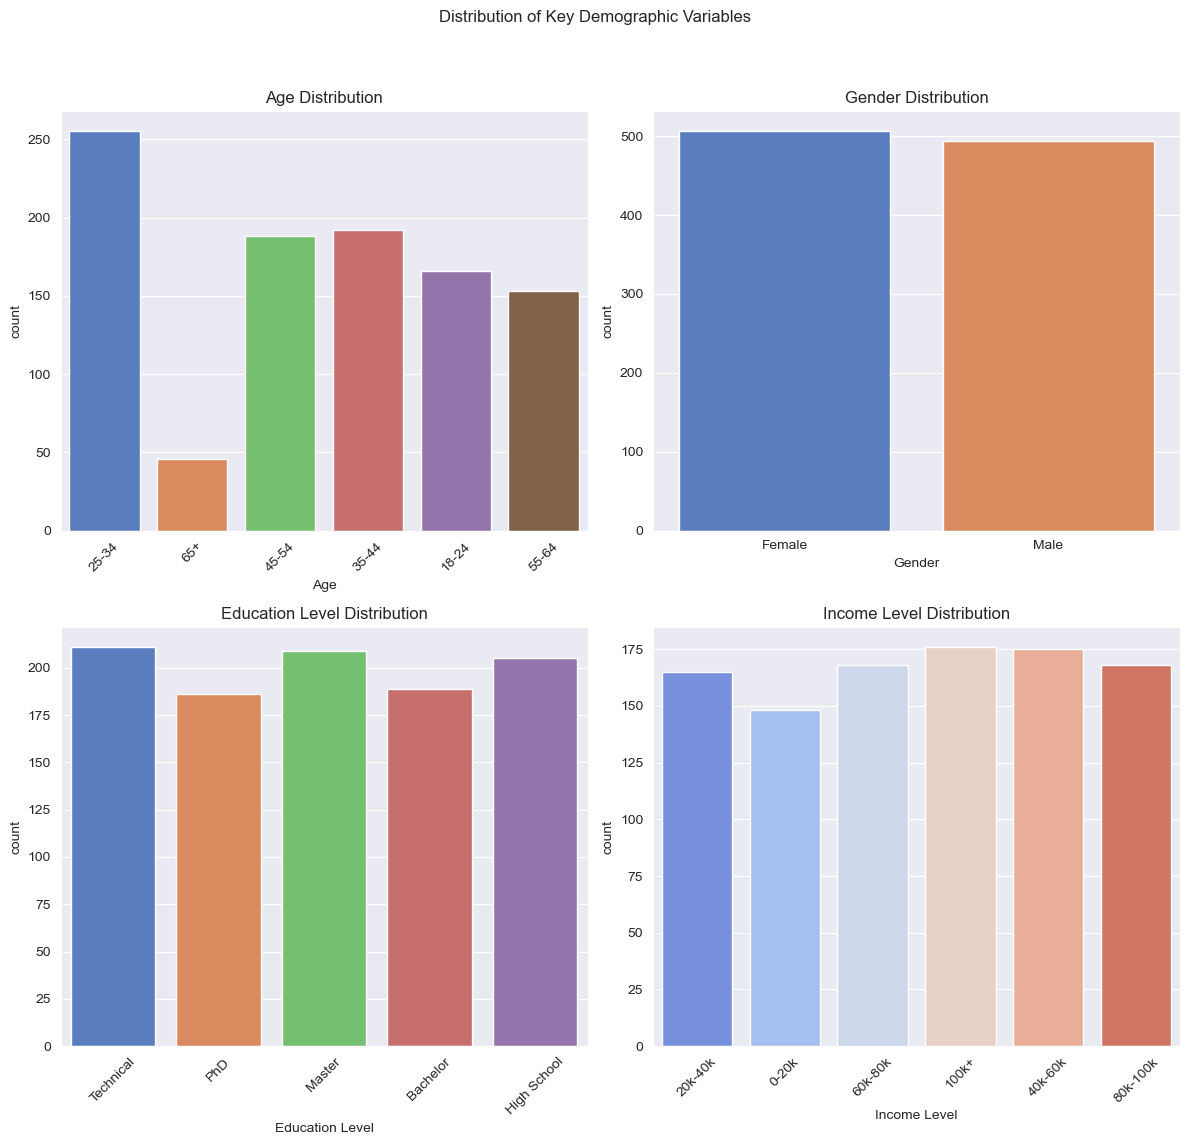

In [5]:
# Let's visualizing the distribution of the key demographic variable(age, gender, education level and income level)

#setting the plotting style
sns.set_style('darkgrid')

#creating subplot for the demographic distribution
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Distribution of Key Demographic Variables')

# Age distribution
sns.countplot(ax=axes[0,0], x='Age', data=data, palette='muted')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)


# Gender distribution 
sns.countplot(ax=axes[0,1], x='Gender', data=data, palette='muted')
axes[0,1].set_title("Gender Distribution")
#axes[0,1].tick_params(axis='x', rotation=45)

# Education level distribution
sns.countplot(ax=axes[1, 0], x='Education Level', data=data, palette='muted')
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Income Level distribution
sns.countplot(ax=axes[1, 1], x='Income Level', data=data, palette='coolwarm')
axes[1, 1].set_title('Income Level Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Now let's analyse the feature "Device Usage" to under understand the primary means by which users access the platform. This information is crucial for optimizing ad formats and delivery channels

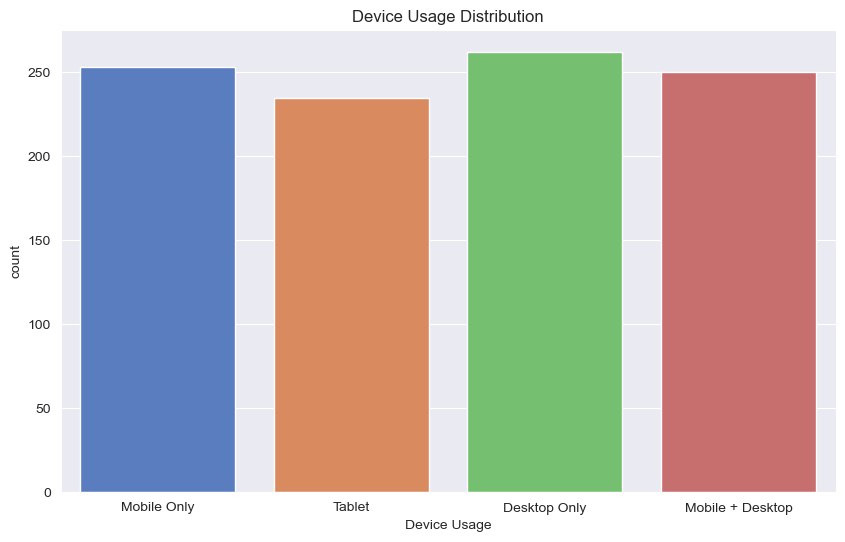

In [6]:
# Device Usage distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Device Usage', data=data, palette='muted')
plt.title('Device Usage Distribution')
plt.show()

Next, let's explore users’ online behaviour, including their engagement with content and ads, and identify the most common interests among users. This help to understand the users’ activity patterns and their interaction with ads, which is crucial for effective ad targeting and optimization. 

c:\Users\nguim\miniconda3\envs\my_venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguim\miniconda3\envs\my_venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguim\miniconda3\envs\my_venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nguim\miniconda3\envs\my_venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

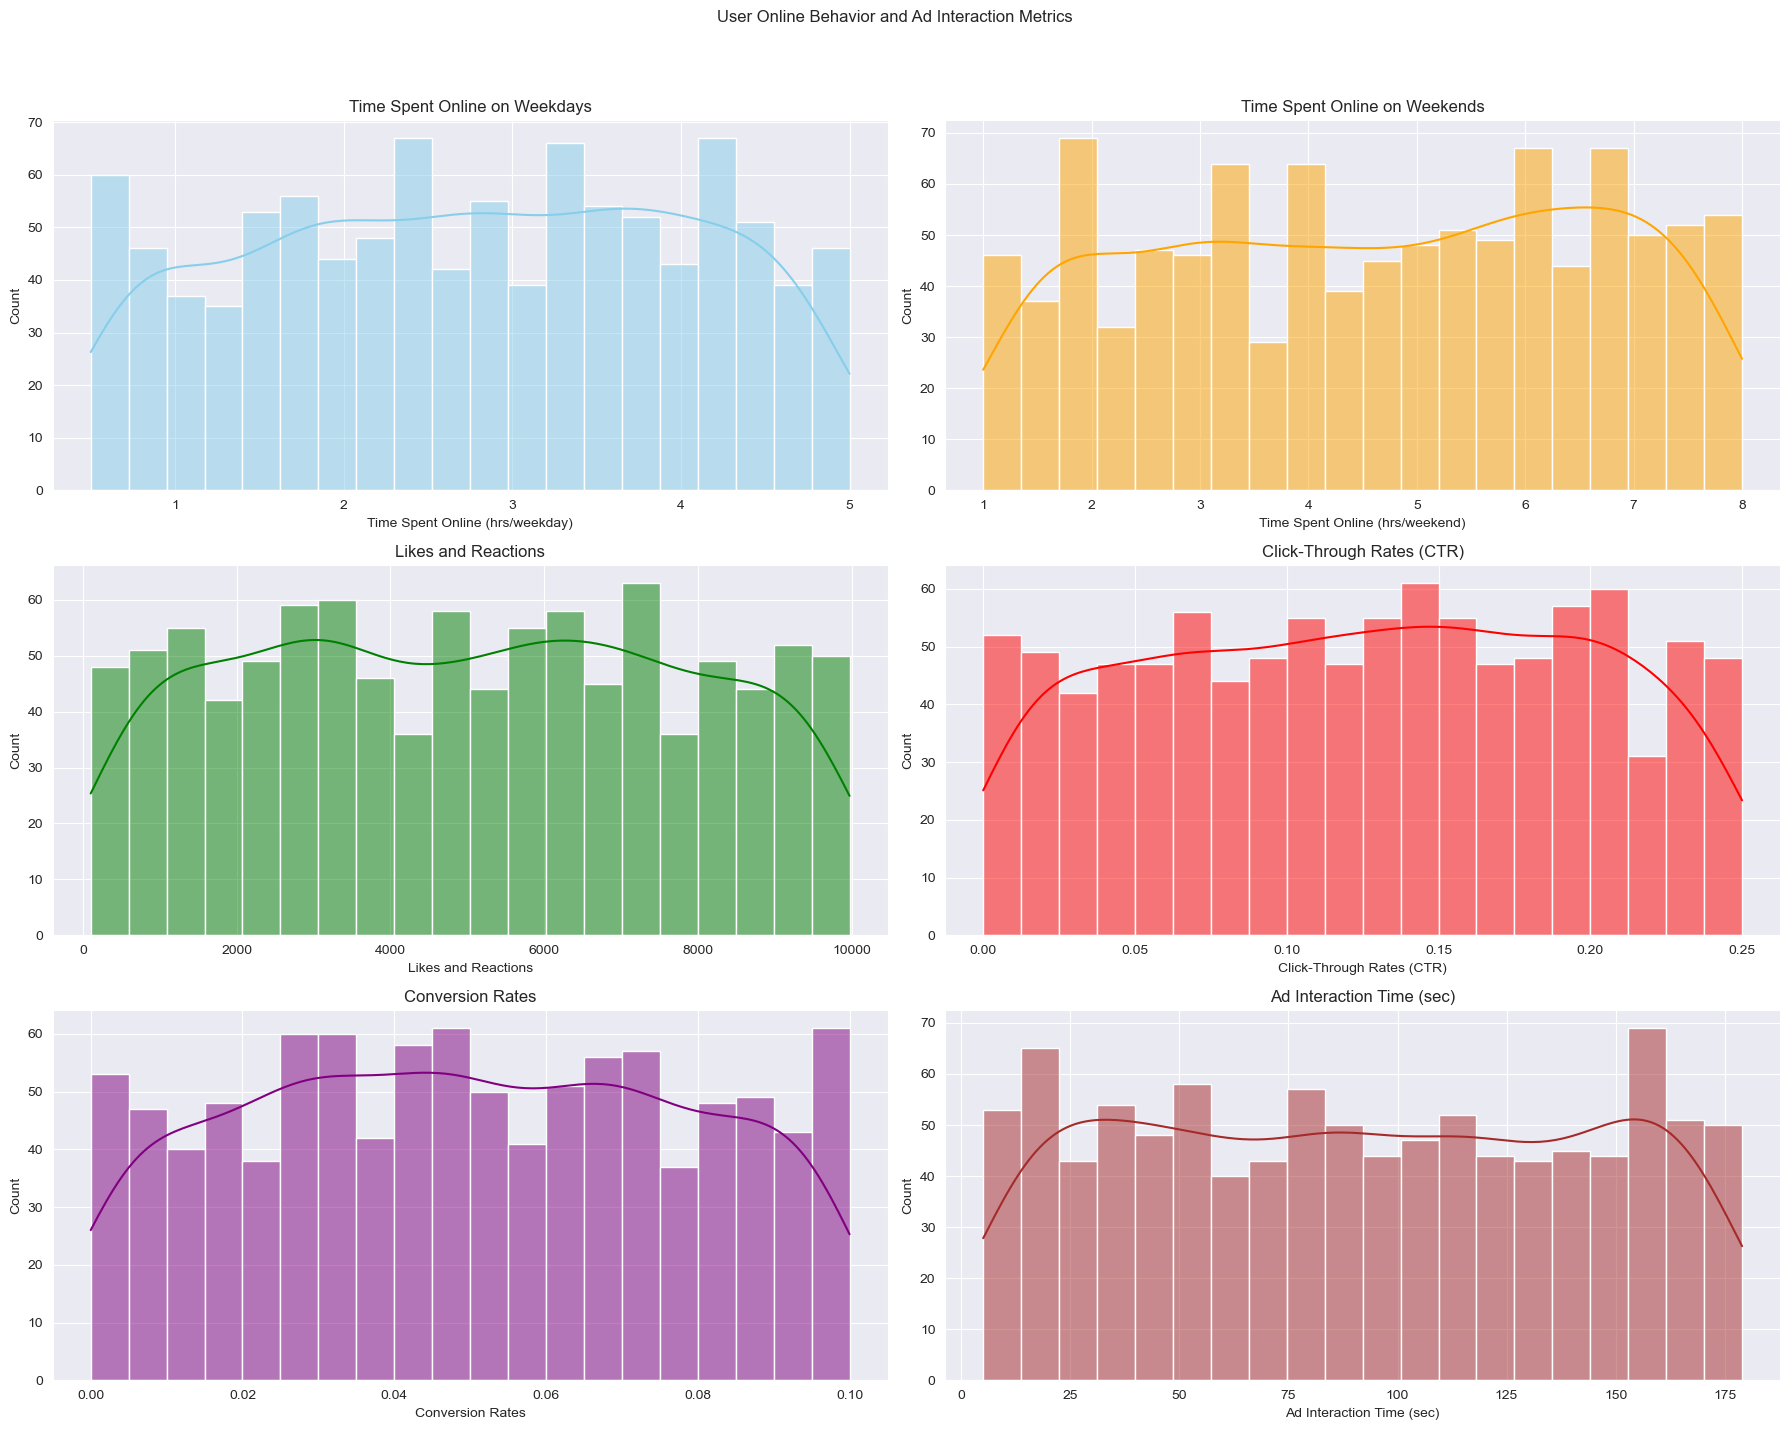

In [7]:
# creating subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# time spent online on weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Time Spent Online on Weekdays')

# time spent online on weekends
sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends')

# likes and reactions
sns.histplot(ax=axes[1, 0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
axes[1, 0].set_title('Likes and Reactions')

# click-through rates
sns.histplot(ax=axes[1, 1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
axes[1, 1].set_title('Click-Through Rates (CTR)')

# conversion rates
sns.histplot(ax=axes[2, 0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[2, 0].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=axes[2, 1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Now, let’s identify the most common interests among users, which is vital for segmenting the audience and tailoring ad campaigns to match user preferences. 

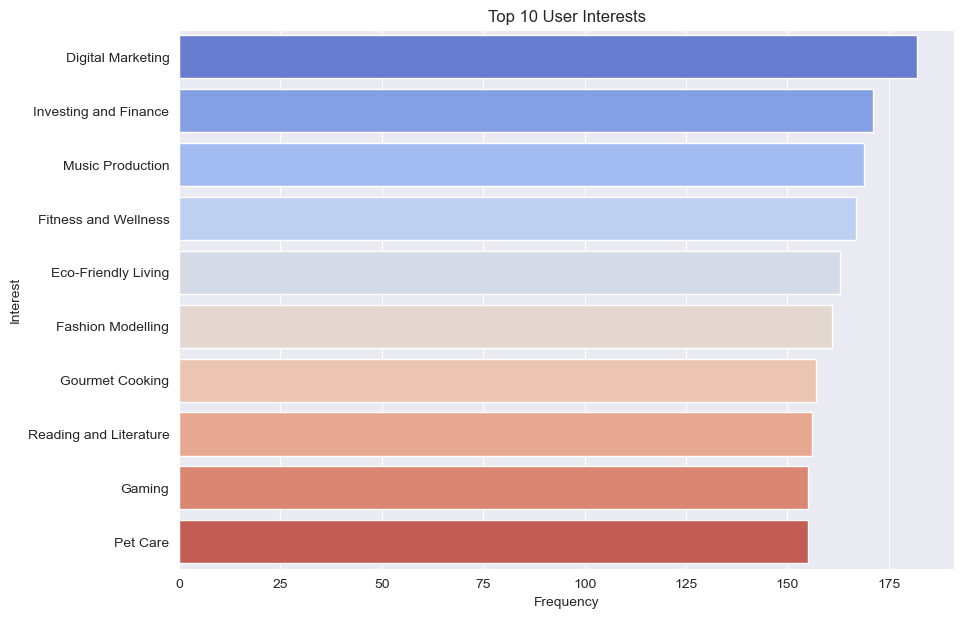

In [8]:
from collections import Counter

# splitting the 'Top Interests' column and creating a list of all interests
interests_list = data['Top Interests'].str.split(', ').sum()

# counting the frequency of each interest
interests_counter = Counter(interests_list)

# converting the counter object to a DataFrame for easier plotting
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

# plotting the most common interests
plt.figure(figsize=(10, 7))
sns.barplot(x='Frequency', y='Interest', data=interests_df.head(10), palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

### User Profiling and Segmentation Model

We can now segment users into distinct groups for targeted ad campaigns. 

To implement user profiling and segmentation, we can apply **clustering** techniques or develop personas based on the combination of these attributes. This approach enables the creation of more personalized and effective ad campaigns, ultimately enhancing user engagement and conversion rates.

We start by selecting a subset of **features** that could be most indicative of user preferences and behaviour for segmentation and apply a clustering algorithm to create user segments. 

In [9]:
# importing library 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [10]:
# selecting features for clustering
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# separating the features we want to consider for clustering
X = data[features]

# defining preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels

data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,2
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,1
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,0
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",3
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",2


**Conclusion:** The clustering process has successfully segmented our users into five distinct groups (Clusters 0 to 4). Each cluster represents a unique combination of the features we selected, including age, gender, income level, online behaviour, and engagement metrics. These clusters can serve as the basis for creating targeted ad campaigns tailored to the preferences and behaviours of each segment.

We’ll now compute the mean values of the numerical features and the mode for categorical features within each cluster to get a sense of their defining characteristics:

In [11]:
# computing the mean values of numerical features for each cluster
cluster_means = data.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

cluster_means

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Age,Gender,Income Level
Cluster,,,,,,,
0,3.911111,5.212963,2409.620370,0.149588,25-34,Female,80k-100k
1,1.559394,6.002424,5005.121212,0.179836,35-44,Male,80k-100k
2,3.019737,2.584211,6861.587719,0.170614,25-34,Male,20k-40k
3,3.080882,5.774510,7457.602941,0.067971,25-34,Female,100k+
4,1.809626,3.839572,3021.219251,0.056594,45-54,Female,0-20k


**Interpretation:** 

Now, we’ll assign each cluster a name that reflects its most defining characteristics based on the mean values of numerical features and the most frequent categories for categorical features. Based on the cluster analysis, we can summarize and name the segments as follows:

* Cluster 0 – “Weekend Warriors”: High weekend online activity, moderate likes and reactions, predominantly female, age group 25-34, income level 80k-100k.
* Cluster 1 – “Engaged Professionals”: Balanced online activity, high likes and reactions, predominantly male, age group 25-34, high income (100k+).
* Cluster 2 – “Low-Key Users”: Moderate to high weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 60k-80k, lower CTR.
* Cluster 3 – “Active Explorers”: High overall online activity, lower likes and reactions, predominantly female, age group 25-34, income level 60k-80k.
* Cluster 4 – “Budget Browsers”: Moderate online activity, lowest likes and reactions, predominantly female, age group 25-34, lowest income level (0-20k), lower CTR.


**So to interpret you can say:** 

for example, ads targeting the “Weekend Warriors” could be scheduled for the weekend when they are most active, while “Engaged Professionals” might respond better to ads that are spread evenly throughout the week.

### Conclusion: 

So, this is how you can perform User Profiling and Segmentation using Python. User profiling refers to creating detailed profiles that represent the behaviours and preferences of users, and segmentation divides the user base into distinct groups with common characteristics, making it easier to target specific segments with personalized marketing, products, or services.